In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import my_env_util
from importlib import reload
reload(my_env_util)
from my_env_util import make_my_atari_env
from preprocess import preprocess
from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import evaluate_policy


# Pre-processing environments using computer vision to reduce computations in the future and also making it generalize better for different environments

  0%|          | 0/1000 [00:00<?, ?it/s]

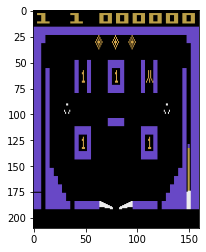

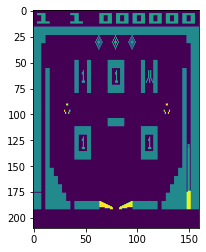

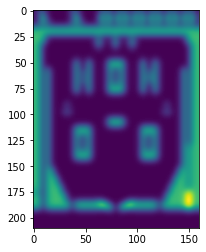

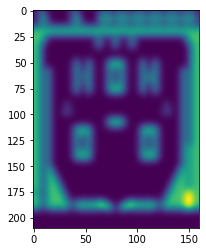

  0%|          | 1/1000 [00:00<08:19,  2.00it/s]

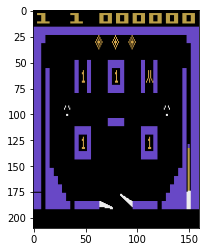

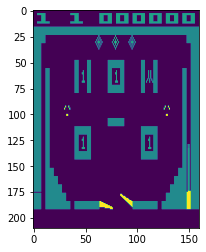

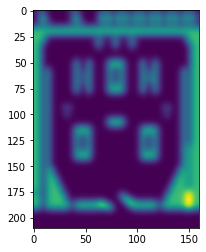

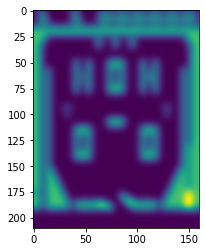

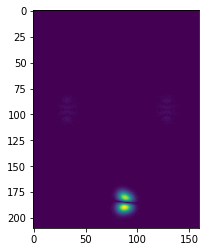

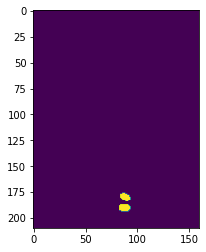

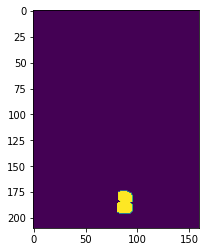

100%|██████████| 1000/1000 [00:04<00:00, 202.28it/s]


In [2]:
env = gym.make('VideoPinball-v0', difficulty=1)
x_start, x_end, y_start, y_end = preprocess(env=env)

In [3]:
wrapper_kwargs = {'start_x': x_start, 'stop_x': x_end, 'start_y': y_start, 'stop_y': y_end}
env = make_my_atari_env('VideoPinball-v0', seed=0, wrapper_kwargs=wrapper_kwargs)

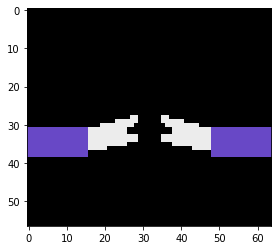

In [4]:
env.reset()
obs, rewards, dones, info = env.step([0])
obs.shape
img = obs[0,:,:,:]
img = np.moveaxis(img, 0, -1)
plt.imshow(img)

# Now we have a much smaller area to observe and learn from

In [ ]:
model = A2C('CnnPolicy', env, verbose=1, device="cuda")
model.learn(total_timesteps=200000)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 7.32e+03 |
|    ep_rew_mean        | 3.41e+03 |
| time/                 |          |
|    fps                | 56       |
|    iterations         | 100      |
|    time_elapsed       | 8        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.19    |
|    explained_variance | -17.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0189  |
|    value_loss         | 0.000219 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 3.4e+03   |
|    ep_rew_mean        | 1.6e+03   |
| time/                 |           |
|    fps                | 57        |
|    iterations         | 200       |
|    time_elapsed       | 17        |
|    total_timesteps    | 1000      |
| train/    

In [ ]:
model.save("model_reduced")

In [ ]:
print(evaluate_policy(model, env, n_eval_episodes=1, render=True))
env.close()